In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [194]:
def morlet_func(x, y, k, sig):
    
    return 1/(2*np.pi*sig**2) * np.exp(-(x**2+y**2)/(2*sig**2)) * np.exp(1j*2*np.pi*(k[0]*x + k[1]*y))

class MorletKernel2D:
    def __init__(self, k, sig, lower_bound=-8, upper_bound=8, dt=1):
        self.k = k
        self.sig = sig
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.N = int((upper_bound - lower_bound) / dt)
        
        
        
    
    def __call__(self, scale):
        N = int(self.N * scale + 1)
        x = np.linspace(self.lower_bound, self.upper_bound, N)
        y = np.linspace(self.lower_bound, self.upper_bound, N)
        xx, yy = np.meshgrid(x, y)
        
        out = morlet_func(xx, yy, self.k, self.sig) / scale**2
        
        #norm_coeff = np.sum(np.abs(out))
        #print(norm_coeff)
        
        return out
    
    
  

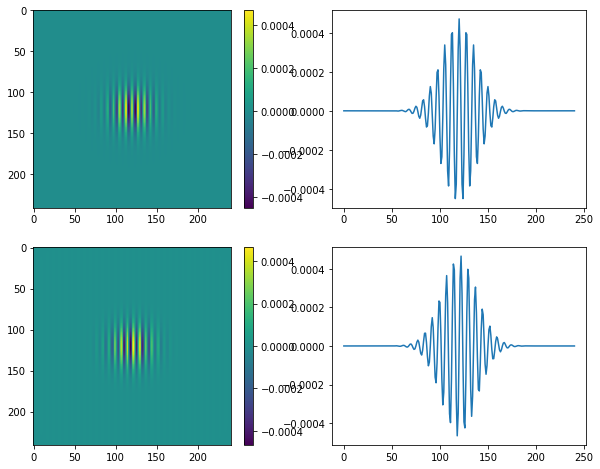

In [224]:


k = [1, 0]
sig = np.sqrt(1.5)
morlet = MorletKernel2D(k, sig)
m = morlet(scale=17)
N, _ = m.shape

plt.figure(figsize=(10, 8))

real = np.real(m)
plt.subplot(2, 2, 1)
plt.imshow(real)
plt.colorbar()
plt.subplot(2,2,2)
plt.plot(real[N//2, :])

imag = np.imag(m)
plt.subplot(2, 2, 3)
plt.imshow(imag)
plt.colorbar()
plt.subplot(2,2,4)
plt.plot(imag[N//2, :])


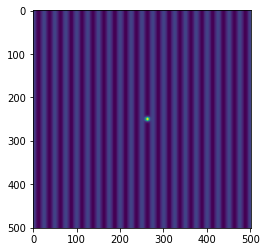

In [280]:
e = 250
N = 501
f0 = 1/25
x = np.linspace(-e, e, N)
y = np.linspace(-e, e, N)
xx, yy = np.meshgrid(x, y)
z = np.cos(2*np.pi*f0*xx)

z += 10*np.exp(-((xx-12.5)**2+yy**2)/5**2)

plt.imshow(z)

In [285]:
from scipy import signal


def cwt_morlet(img, morlet, scales):
    amps = []
    phases = []
    for scale in scales:
        m = morlet(scale)
        cr = signal.correlate(img, np.real(m), method='fft', mode='same') + 1e-15
        ci = signal.correlate(img, np.imag(m), method='fft', mode='same')
        
        phase = np.angle(ci/cr)
        amp = np.sqrt(cr**2 + ci**2)
        
        phases.append(phase)
        amps.append(amp)
    
    return amps, phases
        
        
morlet = MorletKernel2D(k=[0.5,0], sig=np.sqrt(1.5))
scales = np.arange(4, 20, 0.25)
amps, phases = cwt_morlet(z, morlet, scales)
amps = np.array(amps)


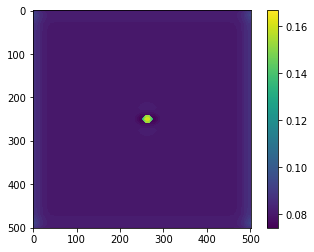

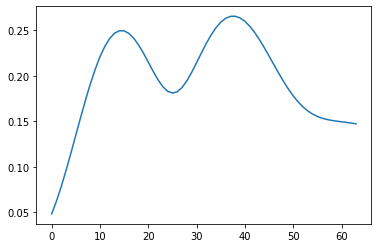

In [286]:
max_indices = np.argmax(amps, axis=0)
freqs = 1 / scales
plt.imshow(freqs[max_indices])
plt.colorbar()
plt.show()
plt.plot(amps[:, N//2, N//2])